<a href="https://colab.research.google.com/github/jafr0822/MNA_ProyectoIntegrador-Equipo7/blob/main/Equipo7_EDA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Integrador
## Tecnológico de Monterrey
### Maestría en Inteligencia Artificial Aplicada (MNA)
#### Avance 1
#### Equipo 7
* Jorge Arturo Federico Rivera – A01250724
* Marco Antonio Vázquez Morales – A01793704
* Alejandro Jesús Vázquez Navarro - A01793146

Proyecto:

*Modelo clasificador de multimorbilidad maternal y predictor de desenlaces perinatales a partir de datos clínicos metabólicos, genéticos y nutricionales de mujeres mexicanas*

05 de mayo de 2024

# Introducción


### Este trabajo tiene como finalidad crear un modelo que pueda predecir el riesgo de sufrir alguna afectación a la mujer o su feto en el proceso de embarazo, tomando como base los datos clínicos, metabólicos, genéticos y nutricionales. Se trata de encontrar una variable dependiente que permita detectar las emfermedades a tiempo para poder reducir el impacto negativo que puediera tener en uno o ambos casos.

### En primer termino se enlistan las variabales que se van a utilizar, en esta étapa identificamos 99 en donde las que estan en color naranja representan las posibles variables dependendientes, las que estan en azul son las variables explicativas, las que estan en color rojo serían las variables de salida.

### Posteriormente realizamos una revisión a los datos, luego quitamos las columnas que no serán útiles para después realizar un análisis exploratorio de los datos utilizando ydata-profilling y Sweetviz.

### Debido al número extenso de variables (96) generamos reportes estáticos en html para su mejor visualización.

### Estos pueden consultarse en estas ligas:
- [Reporte mínimo exploratorio](https://github.com/jafr0822/MNA_ProyectoIntegrador-Equipo7/blob/8a9e4300831ede90791258bd5b58acd44c456537/data/reports/profile1_min_report.html)

- [Reporte completo exploratorio](https://github.com/jafr0822/MNA_ProyectoIntegrador-Equipo7/blob/8a9e4300831ede90791258bd5b58acd44c456537/data/reports/profile1_exp_report.html)

- [Reporte realizado con sweetViz](https://github.com/jafr0822/MNA_ProyectoIntegrador-Equipo7/blob/8a9e4300831ede90791258bd5b58acd44c456537/data/reports/sv_report1.html)


# Estructura de datos

Despúes de una revisión con la parte médica, definimos las siguientes variables como la estrucutura base para la generación de los modelos predicitivos.
A continuación se listan y describen las variables que serán utilizadas para este proyecto.

Las variables en rojo serán consolidadas para la creación de la variable dependiente llamada `IndexMorbilidad`

La variable dependiente candidata (en marrón) era `sdg_parto`, se descartó debido a que solo está presente en el 50.5%  de las observaciones

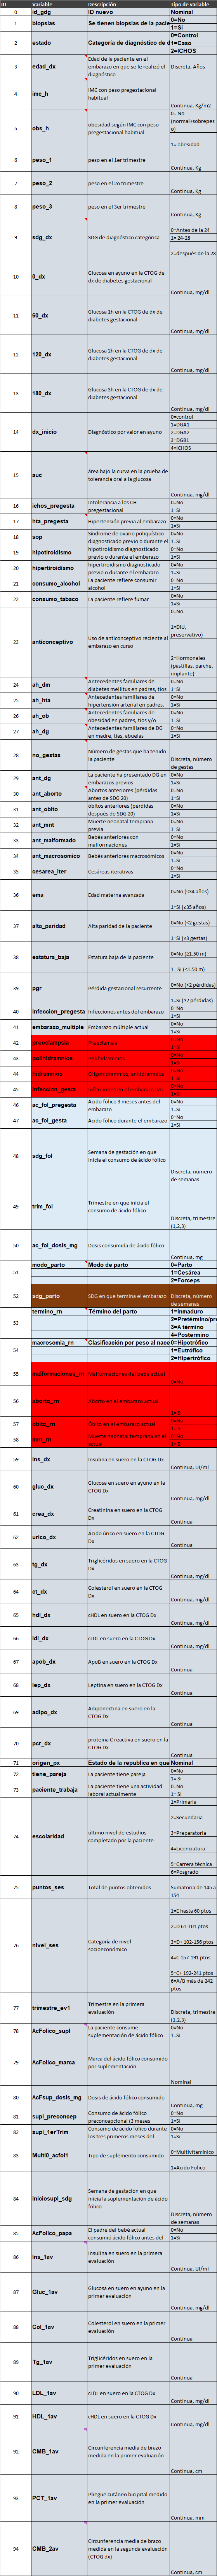


### Install libraries for Colab

In [1]:
#%pip install matplotlib-venn missingno sweetviz ydata-profiling
#%pip install --upgrade Pillow
#%pip install --upgrade scikit-learn
#%pip install git+https://github.com/MIDASverse/MIDASpy.git

import importlib

# List of libraries to install
libraries_to_install = [
    ("matplotlib_venn", "matplotlib_venn"),
    ("missingno", "missingno"),
    ("sweetviz", "sweetviz"),
    ("ydata_profiling", "pandas_profiling"),
    ("Pillow", "PIL"),
    ("scikit-learn", "sklearn"),
    ("MIDASpy", "midas"),
]

for package, module in libraries_to_install:
    try:
        importlib.import_module(module)
        print(f"{module} is already installed.")
    except ImportError:
        print(f"Installing {module}...")
        %pip install {package}


matplotlib_venn is already installed.
missingno is already installed.
sweetviz is already installed.
pandas_profiling is already installed.
PIL is already installed.
sklearn is already installed.
Installing midas...
  Using cached tensorflow_addons-0.19.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 49.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Un

### Import libraries

In [ ]:
import pandas as pd
import sweetviz as sv
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns

# CREATE REPORTS
_BLN_REPORTS = False

# Funciones ad hoc

In [ ]:

# Creamos una función para calcular y graficar la porosidad del dataframe
def getPorosidad(df):

  porosidad = df.isnull().sum() / len(df)

  porosidad_df = pd.DataFrame({
      'Caracteristica': porosidad.index,
      'Porosidad': porosidad.values
  })

  # Ordenar el DataFrame por porosidad de mayor a menor
  porosidad_df = porosidad_df.sort_values(by='Porosidad', ascending=True)
  # Crear la gráfica de barras
  plt.figure(figsize=(6, 14))
  variables_interes = ['sdg_parto', 'preeclampsia', 'polihidramnios', 'hidramnios', 'infeccion_gesta', 'malformaciones_rn', 'aborto_rn', 'obito_rn', 'mnt_rn']

  colors = ['skyblue' if x not in variables_interes else 'orange' for x in porosidad_df['Caracteristica']]

  bars = plt.barh(porosidad_df['Caracteristica'], porosidad_df['Porosidad'], color=colors)  # Use barh for horizontal bars

  # Add value at the end of each bar
  for bar, value in zip(bars, porosidad_df['Porosidad']):
      plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f"{value:.2%}", va='center', ha='left')

  plt.xlabel('% Porosidad')
  plt.ylabel('Caracteristica')
  plt.title('Porosidad por Columna')
  plt.xticks(rotation=90, ha='right')
  plt.tight_layout()
  plt.show()

def getPorosidadQuintiles(df):

    porosidad = df.isnull().sum() / len(df)
    porosidad_df = pd.DataFrame({
        'Caracteristica': porosidad.index,
        'Porosidad': porosidad.values
    })

    # Ordenar el DataFrame por porosidad de mayor a menor
    porosidad_df = porosidad_df.sort_values(by='Porosidad', ascending=True)

    # Crear la gráfica de barras
    plt.figure(figsize=(6, 14))

    variables_interes = ['sdg_parto', 'preeclampsia', 'polihidramnios', 'hidramnios', 'infeccion_gesta', 'malformaciones_rn', 'aborto_rn', 'obito_rn', 'mnt_rn']
    colors = ['skyblue' if x not in variables_interes else 'orange' for x in porosidad_df['Caracteristica']]

    bars = plt.barh(porosidad_df['Caracteristica'], porosidad_df['Porosidad'], color=colors)  # Use barh for horizontal bars

    # Add value at the end of each bar
    for bar, value in zip(bars, porosidad_df['Porosidad']):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f"{value:.2%}", va='center', ha='left')

    # Añadir marcadores para los quintiles
    quintiles = porosidad_df['Porosidad'].quantile([0.2, 0.4, 0.6, 0.8])
    for quintile in quintiles:
        plt.axvline(x=quintile, color='red', linestyle='--', alpha=0.5)

    plt.xlabel('% Porosidad')
    plt.ylabel('Caracteristica')
    plt.title('Porosidad por Columna')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

#####################################################

def getVariablesUltimoQuintil(df):
    porosidad = df.isnull().sum() / len(df)
    porosidad_df = pd.DataFrame({
        'Caracteristica': porosidad.index,
        'Porosidad': porosidad.values
    })

    # Ordenar el DataFrame por porosidad de mayor a menor
    porosidad_df = porosidad_df.sort_values(by='Porosidad', ascending=True)

    # Calcular los quintiles de la porosidad
    quintiles = porosidad_df['Porosidad'].quantile([0.2, 0.4, 0.6, 0.8])

    # Filtrar características que están en el último quintil
    ult_quintil = porosidad_df[porosidad_df['Porosidad'] > quintiles[0.8]]

    return ult_quintil['Caracteristica'].tolist()

########################################################

# Creamos una función para separar las variables categóricas, numéricas
def extract_column_types(df):
    numeric_cols = []
    string_cols = []

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            numeric_cols.append(col)
        elif df[col].dtype == 'object':
            string_cols.append(col)

    return numeric_cols, string_cols


########################################################

# Creamos una función para tener un código más legible
def doImputer(df_numericas):

  df = pd.DataFrame(df_numericas[numeric_cols])
  imputer = IterativeImputer()
  imputed_data = imputer.fit_transform(df)

  df_imputed = pd.DataFrame(imputed_data, columns=df.columns)
  return df_imputed


########################################################

def plot_distribution(df):
    # Extraer columnas numéricas
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Calcular el número de filas y columnas para el mosaico
    num_cols = len(numeric_cols)
    num_rows = (num_cols + 1) // 2  # Redondeo hacia arriba

    # Crear una cuadrícula de subgráficos
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 6))
    axes = axes.flatten()  # Convertir la matriz de ejes en una lista plana

    # Iterar sobre cada columna numérica y crear una gráfica de distribución
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, color='skyblue', ax=axes[i])
        axes[i].set_title(f'Distribución de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes sobrantes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

#######################################

def get_column_types(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    string_cols = df.select_dtypes(include=[object]).columns.tolist()
    #binary_cols = [col for col in df.columns if col not in numeric_cols and col not in string_cols]
    return numeric_cols, string_cols

#######################################

def identify_binary(data):

  binary_cols = []
  for col in data.columns:
    unique_values = data[col].dropna().unique()
    #print(f'Col name {col} unique values {unique_values}')

    if len(unique_values) == 3 and (set(unique_values) == {"", 0.0, 1.0}):  # Check for 0, 1 or "", 1

      binary_cols.append(col)
  return binary_cols

### Read data from Excel databases

#### base_multimorb_fase1_fase_2_clinicas_originales.xlsx

In [ ]:
# Se agrega esta configuración para mostrar todas las variables en el método describe.().T
pd.options.display.max_columns = None


cols_to_include = [
    "id_gdg",
"biopsias",
"estado",
"edad_dx",
"imc_h",
"obs_h",
"peso_1",
"peso_2",
"peso_3",
"sdg_dx",
"gluc_dx_0",
"gluc_dx_60",
"gluc_dx_120",
"gluc_dx_180",
"dx_inicio",
"auc",
"ichos_pregesta",
"hta_pregesta",
"sop",
"hipotiroidismo",
"hipertiroidismo",
"consumo_alcohol",
"consumo_tabaco",
"anticonceptivo",
"ah_dm",
"ah_hta",
"ah_ob",
"ah_dg",
"no_gestas",
"ant_dg",
"ant_aborto",
"ant_obito",
"ant_mnt",
"ant_malformado",
"ant_macrosomico",
"cesarea_iter",
"ema",
"alta_paridad",
"estatura_baja",
"pgr",
"infeccion_pregesta",
"embarazo_multiple",
"preeclampsia",
"polihidramnios",
"hidramnios",
"infeccion_gesta",
"ac_fol_pregesta",
"ac_fol_gesta",
"sdg_fol",
"trim_fol",
"ac_fol_dosis_mg",
"modo_parto",
"sdg_parto",
"termino_rn",
"macrosomia_rn",
"malformaciones_rn",
"aborto_rn",
"obito_rn",
"mnt_rn",
"ins_dx",
"gluc_dx",
"crea_dx",
"urico_dx",
"tg_dx",
"ct_dx",
"hdl_dx",
"ldl_dx",
"apob_dx",
"lep_dx",
"adipo_dx",
"pcr_dx",
"origen_px",
"tiene_pareja",
"paciente_trabaja",
"escolaridad",
"puntos_ses",
"nivel_ses",
"trimestre_ev1",
"AcFolico_supl",
#"AcFolico_marca", # No tiene valor en este estudio
"AcFsup_dosis_mg",
"supl_preconcep",
"supl_1erTrim",
"Multi0_acfol1",
"iniciosupl_sdg",
"AcFolico_papa",
"Ins_1av",
"Gluc_1av",
"Col_1av",
"Tg_1av",
"LDL_1av",
"HDL_1av",
"CMB_1av",
"PCT_1av",
"CMB_2av",
"PCT_2av"


]

excel_file_1 = "data/base_multimorb_fase1_fase_2_clinicas_originales.xlsx"

df1_sheet1 = pd.read_excel(
    excel_file_1,
    sheet_name=0,
    usecols=cols_to_include,
)

df1_sheet2 = pd.read_excel(
    excel_file_1,
    sheet_name=1,
    usecols=cols_to_include,
)

df1_sheets = [
    df1_sheet1,
    df1_sheet2
]

df1 = pd.concat(df1_sheets)
df1.to_csv("primera_Salida.csv")
#df1.describe()

df1.describe(include="all").T

In [ ]:
df1.head(10)

In [ ]:
df1.tail(10)

#### ydata-profiling

##### Generación de análisis univariado y bi/multivariado

In [ ]:
if _BLN_REPORTS==True:
  profile1 = ProfileReport(
      df1,
      title="Minimal Profiling Report for df1",
      # explorative=True,
      minimal=True,
  )
  profile1.to_file("data/reports/profile1_min_report.html")

In [ ]:
if _BLN_REPORTS==True:
  profile1.to_notebook_iframe()

### Debido al tamaño del reporte, se prefirió generar un archivo html llamado  profile1_exp_report.html que está alojado en el repositorio o puede ser consultado en la siguiente liga [EDA_Extensivo](/content/data/reports/profile1_min_report.html):

In [ ]:
if _BLN_REPORTS==True:
  profile1_exp = ProfileReport(
      df1,
      title="Explorative Profiling Report for df1",
      explorative=True,
      # minimal=True,
  )
  profile1_exp.to_file("data/reports/profile1_min_report.html")

##### sweetviz

In [ ]:
# Missingness Map

import missingno as msno
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40, 40))  # Adjust size as needed

# Create the heatmap
msno.heatmap(df1, ax=ax)

# Reduce font size of tick labels (optional)
ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust size as needed

plt.show()

Esta gráfica nos permite identificar zonas de alta correlación con presencia y ausencia de variables.

Por ejemplo, la zona de variables ac_fol_pregesta, ac_fol_gesta, sdg_fol, trim_fol y ac_fol_dosis_mg tiene una ligera correlación positiva en presencia de biopsias.

Misma conducta podemos observarla con las variables trimestre_ev1, acFolico_supl, AcFolico_Marca, AcFsup_dosis_mg, supl_preconcep, supl_1erTrim, Multi0_acfol1, inicisupl_sdg, AcFolico_papa, Gluc_1av, Col_1av, Tg_1av, LDL_1av, HDL_1av, CMB_1av, PCT_1av.

También encontramos correlaciones positivas en presencia de datos con las siguientes pares de variables:

[trimestre_ev1, acFolico_supl, AcFolico_Marca, AcFsup_dosis_mg, supl_preconcep, supl_1erTrim, Multi0_acfol1, inicisupl_sdg, AcFolico_papa, Gluc_1av, Col_1av, Tg_1av, LDL_1av, HDL_1av, CMB_1av, PCT_1av]

<center>vs</center>

[modo_parto, sdg_parto, termino_rn (candidata a variable dependiente), macromosima_rn (candidata a variable dependiente), malformaciones_rn, aborto_rn, obito_rn, mnt_rn, ins_dx, crea_dx, urico_dx, aprob_dx, lep_dx, pcr_dx]

Estos últimos siendo parte del conjunto de marcadores bioquímicos.


# Dendrograma

Este gráfico proporciona información en forma de árbol generado mediante agrupación jerárquica y agrupa columnas que tienen fuertes correlaciones en nulidad.

Si varias columnas se agrupan en el nivel cero, esto significa que la presencia de nulos en una de esas columnas está directamente relacionada con la presencia o ausencia de nulos en las demás columnas. Cuanto más separadas estén las columnas en el árbol, menos probable será que los valores nulos estén correlacionados entre las columnas.



In [ ]:
fig, ax = plt.subplots(figsize=(40, 40))

msno.dendrogram(df1, ax=ax)

ax.tick_params(axis='both', which='major', labelsize=10)
plt.show()

Como se mencionó, este gráfico nos permite entender diferentes grupos de columnas que guardan relación con su presencia o no de datos. Por ejemplo, el grupo de preeclampsia, polihidramnios e hidramnios están fuertemente correlacionados en nulidad. La presencia de una variable en este grupo indica que existe una alta probabilidad de la existencia de otra.

Esto es importante porque gracias a esta gráfica podemos determinar grupos de variables y determinar qué técnica de imputación de datos podemos realizar. Es decir, todo lo que esté relacionado con la glucosa, puede ser tratado con la misma técnica de imputación.

Inclusive podemos identificar clusters de columnas a nivel cero como obs_h, talla, estatura_baja, ev_1ertrim, ev_dieta, edad_dx y ema que indican tener una gran densidad de dato.

# Densidad

Además de los análisis anteriores, evaluamos el nivel de densidad de las características. Es decir:

$$ Porosidad = TotalCeldasVacias / TotalFilas
$$
​

Esto se calcula a continuación:

In [ ]:
from IPython.display import display, HTML

# Adjust the max width of output cells to fit the screen
display(HTML("<style>.container { width:100% !important; }</style>"))

# Hide the vertical scroll bar for output cells
display(HTML("<style>.output { overflow-y: hidden; }</style>"))


# Graficamos la porosidad inicial
getPorosidad(df1)

Gráfica de quintiles para determinar qué variables podemos recomendar eliminar.

In [ ]:
getPorosidadQuintiles(df1)

Las siguientes variables que se encuentran en el último quintil, serán recomendada eliminarlas de la matriz de datos:


In [ ]:
getVariablesUltimoQuintil(df1)



Podemos observar que la variable dependiente candidata `sdg_parto` tiene un 49.5% de densidad. Esto no permitirá tener un modelo fiable, ya que, si optamos por la eliminación de filas sin variable dependiente, solo tendríamos **1,188 * (1-0.495) = 599** (redondeado) observaciones.

Por lo tanto, crearemos una variable dependiente (en la fase Ingeniería de Características) llamada `IndexMorbilidad` considerando los factores de morbilidad de la base de datos:


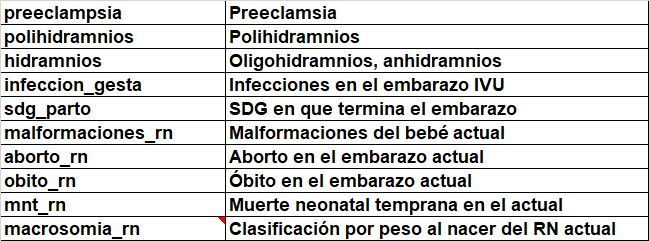

# Preprocesamiento

Realizaremos las siguientes acciones:
- Data imputation mediante el método multivariate feature imputation
- Generación de variable dependiente mediante la creación de un índice de morbilidades.

Además, eliminaremos las características que se encuentran en el último quintil de porosidad, esto previamente consultado con el equipo de investigación.


# Data Imputation

Utilizaremos el método Multivariate feature imputation que modela cada característica con valores perdidos en función de otras características y utiliza esa estimación para la imputación.

Lo hace de forma iterativa: en cada paso, una columna de características se designa como salida y y las demás columnas de características se tratan como entradas X. Se ajusta un regresor en (X, y) para y conocido.

In [ ]:
# Lo primero es sustituir los NaN's por celdas vacías para diferenciar limpiamente categóricas de numéricas.
# Un valor NaN confundirá una variable numérica con un vector = [0, 1, 'NA', null] en categórica

# Solo la variable macrosomia_rn es categórica

df_wo_spaces = df1.fillna('')
df_cleaned = df_wo_spaces.replace('NA', '')
df_cleaned = df_cleaned.replace('Na', '')
df_cleaned = df_cleaned.replace('na', '')

# Encontramos typos en la base. Colocaron 'o' (vocal o) en lugar de 0
# Será necesario reemplazar
df_cleaned = df_cleaned.replace('o', 0)

# También encontramos operaciones de division en la variable AcFsup_dosis_mg así que optamos por sustituir por el resultado de la división
# Ejemplo: 0.4 / 1.0 será sustituido por 0.4

df_cleaned["AcFsup_dosis_mg"] = df_cleaned["AcFsup_dosis_mg"].replace('0.4/1.0', 0.4)
#df_cleaned.to_csv("salida.csv")

# Siguiente paso: identificar variables dicotómicas para ejecutar la correcta estrategia de imputación

binary_features = identify_binary(df_cleaned.copy())  # Use a copy to avoid modifying original data
all_cols = set(df_cleaned.columns)


cols_to_remove_from_numeric =["macrosomia_rn", "id_gdg", "origen_px"]

numeric_features = [x for x in all_cols if x not in binary_features]
numeric_features = [x for x in numeric_cols if x not in cols_to_remove_from_numeric]

categorical_features  =["macrosomia_rn"]

#df_cleaned[binary_columns] = df_cleaned[binary_columns].astype(bool)

print(f"Columnas dicotómicas: {binary_features}")
print(f"Columnas numéricas: {numeric_features}")
print(f"Columnas categorica: {categorical_features}")

df_cleaned['macrosomia_rn'] = df_cleaned['macrosomia_rn'].astype(str)

df_cleaned.to_csv("salida.csv")


Eliminaremos las variables `id_gdg` y `origen_px` pues son identificadores. No es necesario imputarlos.

Ahora, será necesario aplicar un algoritmo de imputación, en este caso hemos optado por Multivariate feature imputation

# Data imputacion para variables Numéricas

In [ ]:


from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

df_cleaned.replace('', np.nan, inplace=True)


# Create pipeline for preprocessing
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
    ('binarizer', FunctionTransformer(lambda x: x.astype(bool), validate=False))  # Convert to binary
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features if needed
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical variables
])

preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_features),
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline.fit(df_cleaned)

# Fit and transform the data
transformed_data = pipeline.transform(df_cleaned)


# Get feature names
binary_feature_names = binary_features
numeric_feature_names = numeric_features
categorical_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = binary_feature_names + numeric_feature_names + list(categorical_feature_names)

transformed_df = pd.DataFrame(transformed_data, columns=feature_names)
print(transformed_df)

transformed_df.to_csv("final.csv")


Hemos realizado la imputación de datos, comprobemos.



In [ ]:
plot_distribution(transformed_df)

# Evaluación de porosidad

En este código, revisamos cuántos valores nulos tenemos:



In [ ]:
null_counts_by_column = transformed_df.isnull().sum(axis=0)
null_counts_by_column

Ahora la gráfica para verificar:

In [ ]:
getPorosidad(transformed_df)

Ahora hemos curado el dataset para trabajarlo con ingeniería de datos.

# Selección de variable dependiente

En conjunto con el equipo médico, se ha decidido que la variable dependiente será llamada  `IndexMorbilidaderá` compuesta por la suma de presencias en cada una de las siguientes variables:

- malformaciones_rn
- aborto_rn
- obito_rn
- mnt_rn
- preeclampsia
- polihidramnios
- hidramnios
- infeccion_gesta

Es decir, `IndexMorbilidaderá` tendrá la siguiente escala:

- **Clase A**. Si contiene 8 de ellas
- **Clase B**. Si contiene entre 4 y 7 de ellas
- **Clase C**. Si contiene entre 1 y 3 de ellas
- **Clase D**. Si no contiene ninguna


#### Imputing and Encoding

In [ ]:
df1.isna().sum()

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Define pipelines for each column type
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

string_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))  # assuming missing values should be treated as 0
])

# Define a column transformer to apply pipelines to specific column types
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_pipeline, numeric_cols),
        ('string', string_pipeline, string_cols),
        ('binary', binary_pipeline, binary_cols)
    ])

# Impute missing values in the DataFrame
df_imputed = preprocessor.fit_transform(df1)
print(df_imputed)


# Conclusiones

### Después de realizar el análisis exploratorio de los datos tenemos 97 variables de las cuales 56 son categóricas, 40 númericas y 1 de texto.

### No obstante que previamente se habían eliminado algunas columnas, después del EDA, aún tenemos variables que presentan datos faltantes muy altos, que de mantenerlos podrían afectar el resultado del modelo, por lo que realizaremos una evaluación de cada una para ver si es posible realizar un método de imputación o definitivamente las quitamos, esta parte se trabajará con el Hospital toda vez que podríamos estar quitando alguna variable que puede ser relevante desde el punto de vista médico para el objetivo de este trabajo.

### En el sweetviz se puede encontrar marcado en rojo y en amarillo aquellas variables que presentan este tipo de problema. Las que estan en color verde las que estan dentro de un rango permitido.